### In this notebook we will explore how varying protein concentration can affect our fluorescence assay results

We will simulate expected fluorescence results for a ligand protein with known Kd and protein concentrations.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Here we are using the same setup as 'Simulating Experimental Fluorescence Binding Data'.

In [4]:
# Now we can use this to define a function that gives us PL from Kd, Ptot, and Ltot.
def two_component_binding(Kd, Ptot, Ltot):
    """
    Parameters
    ----------
    Kd : float
        Dissociation constant
    Ptot : float
        Total protein concentration
    Ltot : float
        Total ligand concentration
        
    Returns
    -------
    P : float
        Free protein concentration
    L : float
        Free ligand concentration
    PL : float
        Complex concentration
    """
                                    
    PL = 0.5 * ((Ptot + Ltot + Kd) - np.sqrt((Ptot + Ltot + Kd)**2 - 4*Ptot*Ltot))  # complex concentration (uM)
    P = Ptot - PL; # free protein concentration in sample cell after n injections (uM)                                                                                                                                                                                                                          
    L = Ltot - PL; # free ligand concentration in sample cell after n injections (uM)                                                                                                                                                                                                                           
    return [P, L, PL]

Let's say we have four ligands with 0.1, 1, 10, and 100 nM binding affinities.

In [5]:
Kd_high = 0.1e-9 # M
Kd_mid_high = 1e-9 # M
Kd_mid_low = 10e-9 # M
Kd_low = 100e-9 # M

In this case we will define our protein concentration as higher than the Kd of our lowest affinity ligand.

In [6]:
Ptot = 500e-9 # M

We will define the ligand concentration as previously done. (Half log dilution from 20 uM.)

In [8]:
Ltot = 20.0e-6 / np.array([10**(float(i)/2.0) for i in range(12)]) # M

In [10]:
[L, P, PL] = two_component_binding(Kd_low, Ptot, Ltot)

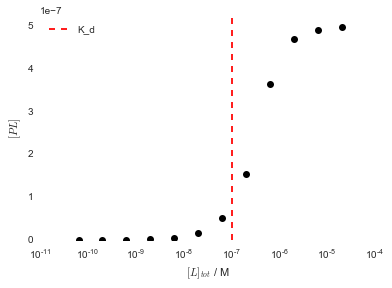

In [12]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot, PL, 'ko')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$')
plt.ylim(0, 1.05*np.max(PL))
plt.axvline(Kd_low,color='r',linestyle='--',label='K_d')
plt.legend(loc=0);

In [13]:
[L_high, P_high, PL_high] = two_component_binding(Kd_high, Ptot, Ltot)
[L_mid_high, P_mid_high, PL_mid_high] = two_component_binding(Kd_mid_high, Ptot, Ltot)
[L_mid_low, P_mid_low, PL_mid_low] = two_component_binding(Kd_mid_low, Ptot, Ltot)
[L_low, P_low, PL_low] = two_component_binding(Kd_low, Ptot, Ltot)

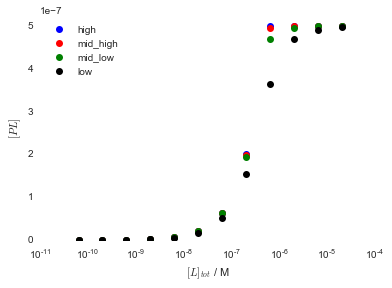

In [15]:
plt.semilogx(Ltot, PL_high, 'bo',label = 'high')
plt.semilogx(Ltot, PL_mid_high, 'ro',label = 'mid_high')
plt.semilogx(Ltot, PL_mid_low, 'go',label = 'mid_low')
plt.semilogx(Ltot, PL_low, 'ko',label = 'low')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$')
plt.ylim(0, 1.05*np.max(PL))
plt.legend(loc=0);

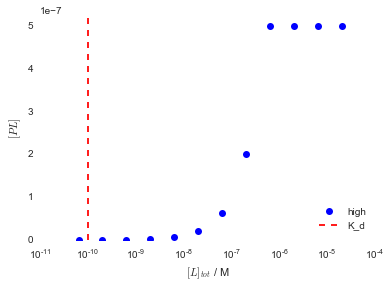

In [17]:
plt.semilogx(Ltot, PL_high, 'bo',label = 'high')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$')
plt.ylim(0, 1.05*np.max(PL))
plt.axvline(Kd_high,color='r',linestyle='--',label='K_d')
plt.legend(loc=0);

Hmm. Let's see if varying our protein concentration for our high affinity ligand so that it's closer to our Kd can give us better fluorescence data.

In [19]:
#Our high affinity ligand has an affinity of 0.1e-9 # M
Ptot_dilute = 0.5e-9 # M
Ptot_mid_dilute = 5e-9 # M
Ptot_mid_conc = 50e-9 # M
Ptot_conc = 500e-9 # M

In [20]:
[L_dilute, P_dilute, PL_dilute] = two_component_binding(Kd_high, Ptot_dilute, Ltot)
[L_mid_dilute, P_mid_dilute, PL_mid_dilute] = two_component_binding(Kd_high, Ptot_mid_dilute, Ltot)
[L_mid_conc, P_mid_conc, PL_mid_conc] = two_component_binding(Kd_high, Ptot_mid_conc, Ltot)
[L_conc, P_conc, PL_conc] = two_component_binding(Kd_high, Ptot_conc, Ltot)

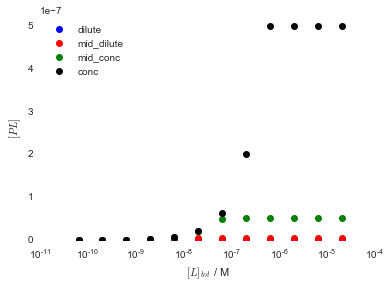

In [21]:
plt.semilogx(Ltot, PL_dilute, 'bo',label = 'dilute')
plt.semilogx(Ltot, PL_mid_dilute, 'ro',label = 'mid_dilute')
plt.semilogx(Ltot, PL_mid_conc, 'go',label = 'mid_conc')
plt.semilogx(Ltot, PL_conc, 'ko',label = 'conc')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$')
plt.ylim(0, 1.05*np.max(PL))
plt.legend(loc=0);

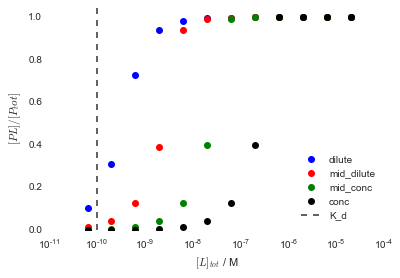

In [29]:
#This will be easier to see if we do fraction bound
plt.semilogx(Ltot, PL_dilute/Ptot_dilute, 'bo',label = 'dilute')
plt.semilogx(Ltot, PL_mid_dilute/Ptot_mid_dilute, 'ro',label = 'mid_dilute')
plt.semilogx(Ltot, PL_mid_conc/Ptot_mid_conc, 'go',label = 'mid_conc')
plt.semilogx(Ltot, PL_conc/Ptot_conc, 'ko',label = 'conc')
plt.axvline(Kd_high,color='0.3',linestyle='--',label='K_d')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]/[P_tot]$')
plt.ylim(0, 1.05)
plt.legend(loc=0);


Let's see how well this helps us discern between our 'high' and 'mid_high' affinity ligands.

In [30]:
[L_dilute_mid_high, P_dilute_mid_high, PL_dilute_mid_high] = two_component_binding(Kd_mid_high, Ptot_dilute, Ltot)
[L_mid_dilute_mid_high, P_mid_dilute_mid_high, PL_mid_dilute_mid_high] = two_component_binding(Kd_mid_high, Ptot_mid_dilute, Ltot)
[L_mid_con_mid_highc, P_mid_conc_mid_high, PL_mid_conc_mid_high] = two_component_binding(Kd_mid_high, Ptot_mid_conc, Ltot)
[L_conc_mid_high, P_conc_mid_high, PL_conc_mid_high] = two_component_binding(Kd_mid_high, Ptot_conc, Ltot)

In [ ]:
Ptot_dilute = 0.5e-9 # M
Ptot_mid_dilute = 5e-9 # M
Ptot_mid_conc = 50e-9 # M
Ptot_conc = 500e-9 # M

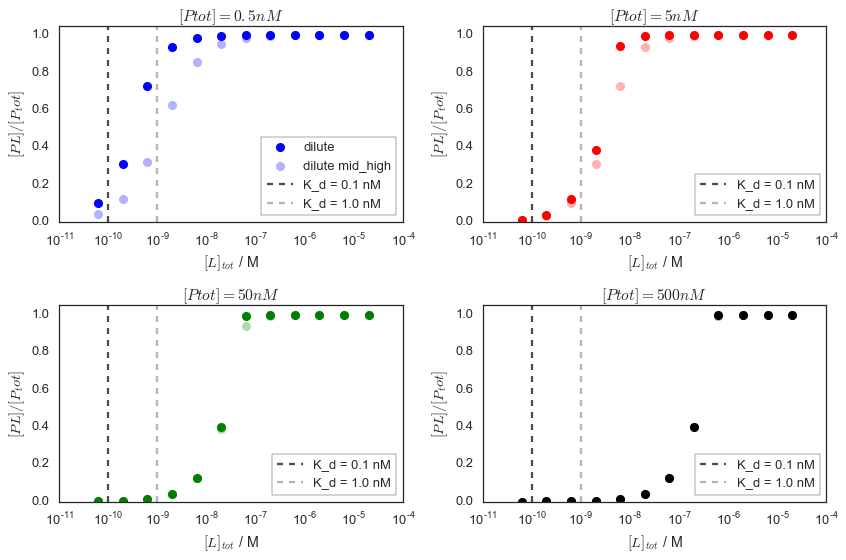

In [46]:
plt.figure(figsize=(12,8));
sns.set(style='white')
sns.set_context('talk')

plt.subplot(221)
plt.semilogx(Ltot, PL_dilute/Ptot_dilute, 'bo',label = 'dilute')
plt.semilogx(Ltot, PL_dilute_mid_high/Ptot_dilute, 'bo',alpha=0.3,label = 'dilute mid_high')

plt.axvline(Kd_high,color='0.3',linestyle='--',label='K_d = 0.1 nM')
plt.axvline(Kd_mid_high,color='0.7',linestyle='--',label='K_d = 1.0 nM')

plt.title('$[Ptot] = 0.5 nM$')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]/[P_tot]$')
plt.ylim(0, 1.05)
plt.legend(loc=0,frameon=True);

plt.subplot(222)
plt.semilogx(Ltot, PL_mid_dilute/Ptot_mid_dilute, 'ro')
plt.semilogx(Ltot, PL_mid_dilute_mid_high/Ptot_mid_dilute, 'ro',alpha=0.3)

plt.axvline(Kd_high,color='0.3',linestyle='--',label='K_d = 0.1 nM')
plt.axvline(Kd_mid_high,color='0.7',linestyle='--',label='K_d = 1.0 nM')

plt.title('$[Ptot] = 5 nM$')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]/[P_tot]$')
plt.ylim(0, 1.05)
plt.legend(loc=0,frameon=True);

plt.subplot(223)
plt.semilogx(Ltot, PL_mid_conc/Ptot_mid_conc, 'go')
plt.semilogx(Ltot, PL_mid_conc_mid_high/Ptot_mid_conc, 'go',alpha=0.3)

plt.axvline(Kd_high,color='0.3',linestyle='--',label='K_d = 0.1 nM')
plt.axvline(Kd_mid_high,color='0.7',linestyle='--',label='K_d = 1.0 nM')

plt.title('$[Ptot] = 50 nM$')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]/[P_tot]$')
plt.ylim(0, 1.05)
plt.legend(loc=0,frameon=True);

plt.subplot(224)
plt.semilogx(Ltot, PL_conc/Ptot_conc, 'ko')
plt.semilogx(Ltot, PL_conc_mid_high/Ptot_conc, 'ko',alpha=0.3)

plt.axvline(Kd_high,color='0.3',linestyle='--',label='K_d = 0.1 nM')
plt.axvline(Kd_mid_high,color='0.7',linestyle='--',label='K_d = 1.0 nM')

plt.title('$[Ptot] = 500 nM$')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]/[P_tot]$')
plt.ylim(0, 1.05)
plt.legend(loc=0,frameon=True);

plt.tight_layout();


"As long as the affinity is much tighter than the concentration of macromolecule your binding curve will look similar to this hypothetical extreme case, and you will only be able to place a lower bound on the affinity." - Nick Levinson

There you go!

In [48]:
#Our other question here, is whether our molar fluorescence for our complex 
# will allow is to go to this low of a concentration.

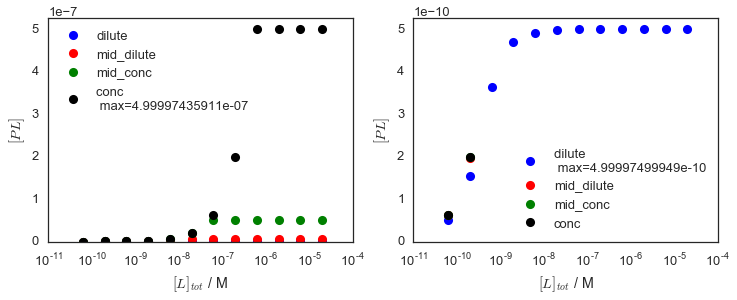

In [54]:
plt.figure(figsize=(12,4));

plt.subplot(121)
plt.semilogx(Ltot, PL_dilute, 'bo',label = 'dilute')
plt.semilogx(Ltot, PL_mid_dilute, 'ro',label = 'mid_dilute')
plt.semilogx(Ltot, PL_mid_conc, 'go',label = 'mid_conc')
plt.semilogx(Ltot, PL_conc, 'ko',label = 'conc \n max=%s'%np.max(PL_conc))
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$')
plt.ylim(0, 1.05*np.max(PL_conc))
plt.legend(loc=0);

plt.subplot(122)
plt.semilogx(Ltot, PL_dilute, 'bo',label = 'dilute \n max=%s' %np.max(PL_dilute))
plt.semilogx(Ltot, PL_mid_dilute, 'ro',label = 'mid_dilute')
plt.semilogx(Ltot, PL_mid_conc, 'go',label = 'mid_conc')
plt.semilogx(Ltot, PL_conc, 'ko',label = 'conc')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$')
plt.ylim(0, 1.05*np.max(PL_dilute))
plt.legend(loc=0);